In [1]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd



# Question 1


Considering two matrices $A$ and $B$ of sizes $(n,k)$ and $(k,m)$.

In matrix multiplication, $C = AB$, the resultant $C$ matrix will be of the size $(n,m)$.

That is we will have $n\times m$ elements in the resultant matrix $C$.

In the process of matrix multiplication, to obtain an element $C{ij}$ in $C$, we will take ith row in $A$ and jth column in $B$ and multiply the elements in the corresponding positions and finally add them. These taken rows and columns will have $k$ elements each i.e., to get the element, we need $k$ multiplications and $(k-1)$ additions by manual and $k$ additions while computing through the below written code.

In total, to obtain a complete $C$ matrix, we need to perform $n\times m\times k$ multiplications and $n\times m\times (k-1)$ additions (manual) and $n\times m\times (k)$ additions using code.

 # Question 2

In [3]:
# n = int(input())
# k = int(input())
# m = int(input())
# Matrix1 = []
# Matrix2 = []





# for i in range(n):
#     row = input().split()
#     Matrix1.append([int(j) for j in row])
    
# for i in range(k):
#     row = input().split()
#     Matrix2.append([int(j) for j in row])
    

In [4]:
import random
n = random.randint(100, 200)
k = random.randint(100, 200)
m = random.randint(100, 200)
Matrix1 = []
Matrix2 = []


#print(n, k, m)
#matrix input

for i in range(n):
    row = random.sample(range(1,1000), k)
        
    Matrix1.append(row)
    
for i in range(k):
    row = random.sample(range(1,1000), m)    
    Matrix2.append(row)
    
#print(Matrix1, Matrix2)

In [5]:
#matrix multiplication using list of lists
import time

def Using_lists(n, m, k, Matrix1, Matrix2):
    Matrix_row = n
    Matrix_col = m

    Matrix = [[0 for j in range(m)] for i in range(n)]

    start = time.time()
    for i in range(n):
        for j in range(m):
            Matrix[i][j] =0
            for l in range(k):
                Matrix[i][j] += Matrix1[i][l]*Matrix2[l][j]

    end = time.time()

    time1 = end- start
    return time1


In [6]:
import numpy as np
import time 
def Using_numpy(n, m, k, Matrix1, Matrix2):
    Matrix1 = np.array(Matrix1)
    Matrix2 = np.array(Matrix2)

    #print(Matrix1, Matrix2)

    start = time.time()

    Matrix = Matrix1.dot(Matrix2)

    end = time.time()

    time2 = end- start

    return time2


In [7]:
numpy_time = []
lists_time = []
for i in range(100):
    numpy_time.append(Using_numpy(n, m, k, Matrix1, Matrix2))
    
    lists_time.append(Using_lists(n, m, k, Matrix1, Matrix2))
    
print(numpy_time)
print(lists_time)


#Mean

print("Matrix multiplication using Numpy")
mean_numpy = sum(numpy_time)/100
sd_numpy = np.std(numpy_time)
print("Average time = ", mean_numpy, "+/-",sd_numpy )


print("Matrix multiplication using lists")
mean_lists = sum(lists_time)/100
sd_lists = np.std(lists_time)
print("Average time = ", mean_lists, "+/-",sd_lists )




[0.004364490509033203, 0.0035295486450195312, 0.003531932830810547, 0.008132457733154297, 0.003568410873413086, 0.0033905506134033203, 0.0036301612854003906, 0.0034437179565429688, 0.0035376548767089844, 0.003519296646118164, 0.004267454147338867, 0.0036842823028564453, 0.0035130977630615234, 0.0034723281860351562, 0.00354766845703125, 0.003617525100708008, 0.0034859180450439453, 0.007242441177368164, 0.005585670471191406, 0.007076263427734375, 0.0071756839752197266, 0.006983280181884766, 0.007043361663818359, 0.0085296630859375, 0.003566265106201172, 0.0036611557006835938, 0.0036084651947021484, 0.0035905838012695312, 0.003556489944458008, 0.0034978389739990234, 0.003505229949951172, 0.0035619735717773438, 0.0035400390625, 0.0035593509674072266, 0.0044710636138916016, 0.003612995147705078, 0.00351715087890625, 0.003506898880004883, 0.0035550594329833984, 0.003420591354370117, 0.0034635066986083984, 0.0034224987030029297, 0.0035359859466552734, 0.003595590591430664, 0.00337433815002441

From the above results, we can observe that, computing multiplication of matrices using numpy is faster than using lists. 
This can be attributed to the following reasons:
1. Lists involve non-contiguous memory allocation whereas arrays involve contiguous memory allocation (saves time).
2. Some tasks may be executed parallely in case of numpy.
3. Effective use of cache in numpy compared to lists.
 

#Question 3

In [8]:
import random
import time
import numpy as np

n = random.randint(1, 1000)

arr = [random.random() for i in range(n)]

dup = arr.copy()

#print(arr)

def passes_median(arr, n):
    dic = {}
    for i in range(n):
        dic[arr[i]]= -1
    key =[]
    #print(arr)
    for i in range(n//2+1):
        maxi = arr[0]
        for j in range(n):
            if maxi <= arr[j]:
                maxi = arr[j]
                index = j
                
        if (dic[maxi] != index):
            dic[maxi] = index
            key.append(maxi) 
            arr[index] = -1
    if (n%2==0):
        #print(key[-1], key[-2])
        median = (key[-1]+key[-2])/2
    else:
        #print(key[-1])
        median = key[-1]
    #print(dic)
    return median
        
def optimal_median(arr, n):
    arr.sort()
    #print(arr)
    if (n%2==0):
        #print(arr[n//2], arr[n//2-1])
        median = (arr[n//2]+arr[n//2-1])/2
    else:
        #print(arr[n//2])
        median = arr[n//2]
    return median

def numpy_median(arr, n):
    return np.median(arr)
#print(arr)
#print(dic)

print(passes_median(dup, n), optimal_median(arr, n), numpy_median(arr, n))

0.4760853799999569 0.4760853799999569 0.4760853799999569


In [9]:
time_passes=[]
time_optimal=[]
time_numpy = []

for i in range(1000):
    n = random.randint(1, 1000)
    arr = [random.random() for i in range(n)]
    dup = arr.copy()
    start = (time.time())*1000
    med= passes_median(dup, n)
    end = (time.time())*1000
    time_passes.append(end-start)
    
    start = (time.time())*1000
    med = optimal_median(arr, n)
    end = (time.time())*1000
    time_optimal.append(end-start)

    start = (time.time())*1000
    med = numpy_median(arr, n)
    end = (time.time())*1000
    time_numpy.append(end-start)
    
Meantime_passes = sum(time_passes)/100
Meantime_optimal = sum(time_optimal)/100
Meantime_numpy = sum(time_numpy)/100

time_passes = np.array(time_passes)
time_optimal = np.array(time_optimal)
time_numpy = np. array(time_numpy)

print("Using passes")
print("Average time = ", Meantime_passes, "+/-",np.std(time_passes)  )

print("Optimal method")
print("Average time = ", Meantime_optimal, "+/-", np.std(time_optimal))

print("Numpy passes")
print("Average time = ", Meantime_numpy, "+/-",np.std(time_numpy)  )


Using passes
Average time =  196.28471435546874 +/- 23.937328105450064
Optimal method
Average time =  0.792724609375 +/- 0.30327978606462797
Numpy passes
Average time =  3.21015869140625 +/- 0.6136460795691054


We can observe that the optimal method of findind median is faster than the other mentioned menthods to find the median.

Run time of optimal method used = $O(nlogn)$
Run time of passes method used = $O(n^2)$

#Question 4

Given function in terms of x and y is $ f = x^2y + y^3sin(x) $

Gradient of $f$ in terms of x:

 $\partial f / \partial x = 2xy + y^3 cos(x)$
 
Gradient of $f$ in terms of y:

 $\partial f / \partial y = x^2 + 3y^2 sin(x)$

#Question 5

In [10]:
import random
import jax
import jax.numpy as npy
def x_grad(x, y):
    return 2*x*y + (y**3)*npy.cos(x)

def y_grad(x, y):
    return (x**2)+ 3*(y**2)*npy.sin(x)

def function(x, y):
    return (x**2)*y + (y**3)*npy.sin(x)
  

gradx_jax = jax.grad(function, 0)

grady_jax = jax.grad(function, 1)

x = random.random()
y = random.random()

gradx_manual = x_grad(x, y)
grady_manual = y_grad(x, y)
print("Manual")
print("Gradient w.r.t x = ", gradx_manual, "Gradient w.r.t y = ", grady_manual)
print("JAX")
print("Gradient w.r.t x = ",gradx_jax(x, y), "Gradient w.r.t y = ",grady_jax(x, y))



Manual
Gradient w.r.t x =  1.0179477 Gradient w.r.t y =  0.79013187
JAX
Gradient w.r.t x =  1.0179477 Gradient w.r.t y =  0.7901318


#Question 6

In [11]:
import numpy as np

import sympy as sp
x, y = sp.symbols('x, y')
f = (x**2)*y + (y**3)*(sp.sin(x))
print("x gradient = ", sp.diff(f, x))
print("y gradient = ", sp.diff(f, y))

x gradient =  2*x*y + y**3*cos(x)
y gradient =  x**2 + 3*y**2*sin(x)


#Question 7

In [12]:
Student_info = {2022:{"Branch 1":{"Roll Number": 100, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 78, "English": 66} }, 
                      "Branch 2":{"Roll Number": 101, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 90, "English": 56} }}, 
                
               2023: {"Branch 1":{"Roll Number": 102, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 36, "English": 98} }, 
                      "Branch 2":{"Roll Number": 103, 
                                  "Name":"std2",  
                                  "Marks":{"Maths": 70, "English": 67} }},
                
               2024: {"Branch 1":{"Roll Number": 104, 
                                  "Name":"std3",  
                                  "Marks":{"Maths": 84, "English": 88} }, 
                      "Branch 2":{"Roll Number": 105, 
                                  "Name":"std4",  
                                  "Marks":{"Maths": 97, "English": 97} }}, 
                
               2025: {"Branch 1":{"Roll Number": 106, 
                                  "Name":"std5",  
                                  "Marks":{"Maths": 88, "English": 79} }, 
                      "Branch 2":{"Roll Number": 107, 
                                  "Name":"std6",  
                                  "Marks":{"Maths": 75, "English": 85} }}}

print(Student_info)

{2022: {'Branch 1': {'Roll Number': 100, 'Name': 'std1', 'Marks': {'Maths': 78, 'English': 66}}, 'Branch 2': {'Roll Number': 101, 'Name': 'std1', 'Marks': {'Maths': 90, 'English': 56}}}, 2023: {'Branch 1': {'Roll Number': 102, 'Name': 'std1', 'Marks': {'Maths': 36, 'English': 98}}, 'Branch 2': {'Roll Number': 103, 'Name': 'std2', 'Marks': {'Maths': 70, 'English': 67}}}, 2024: {'Branch 1': {'Roll Number': 104, 'Name': 'std3', 'Marks': {'Maths': 84, 'English': 88}}, 'Branch 2': {'Roll Number': 105, 'Name': 'std4', 'Marks': {'Maths': 97, 'English': 97}}}, 2025: {'Branch 1': {'Roll Number': 106, 'Name': 'std5', 'Marks': {'Maths': 88, 'English': 79}}, 'Branch 2': {'Roll Number': 107, 'Name': 'std6', 'Marks': {'Maths': 75, 'English': 85}}}}


#Question 8

In [13]:
class year:
  def __init__(self, years, branch):
    self.years= years
    self.branch = branch

class Branch:
  def __init__(self, branch, student_data):
    self.branch = branch
    self.student_data = student_data

class Data:
  def __init__(self, Roll_num, Name, Marks):
    self.Roll_num = Roll_num
    self.Name = Name
    self.Marks= Marks


Database = [year(2022, [Branch("Branch 1", [Data(100, "cat1", {"Eng": 86, "Social": 65})]), Branch("Branch 2", [Data(101, "dog1", {"Eng": 76, "Social": 65})])]), 
            year(2023, [Branch("Branch 1", [Data(102, "cat2", {"Eng": 89, "Social": 93})]), Branch("Branch 2", [Data(103, "dog2", {"Eng": 84, "Social": 83})])]),
            year(2024, [Branch("Branch 1", [Data(104, "cat3", {"Eng": 23, "Social": 67})]), Branch("Branch 2", [Data(105, "dog3", {"Eng": 73, "Social": 65})])]),
            year(2025, [Branch("Branch 1", [Data(106, "cat4", {"Eng": 84, "Social": 82})]), Branch("Branch 2", [Data(107, "dog4", {"Eng": 56, "Social": 85})])]),
            year(2026, [Branch("Branch 1", [Data(108, "cat5", {"Eng": 90, "Social": 63})]), Branch("Branch 2", [Data(109, "dog5", {"Eng": 74, "Social": 87})])])]

            

#Question 9

1


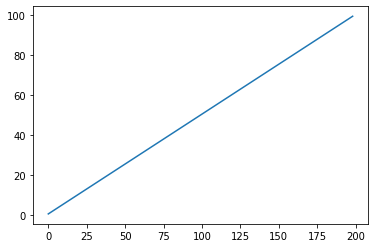

In [14]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0.5, 100, 0.5)

#1 
print("1")

y = x

plt.plot(y)


2


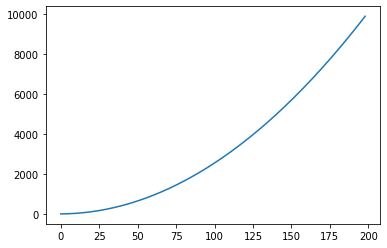

In [15]:
#2 
print("2")

y = x*x

plt.plot(y)



3


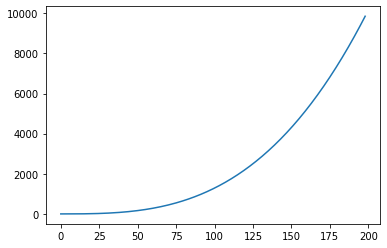

In [16]:
#3 
print("3")

y = (x**3)/100

plt.plot(y)



4


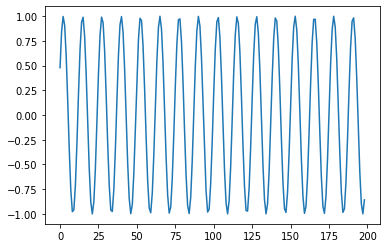

In [17]:
#4 
print("4")

y = np.sin(x)

plt.plot(y)



5


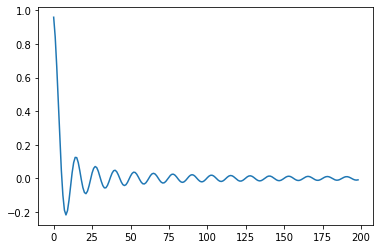

In [18]:
#5
print("5")

y = y/x

plt.plot(y)


6


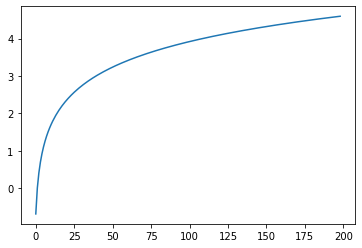

In [19]:
#6
print("6")

y = np.log(x)

plt.plot(y)


7


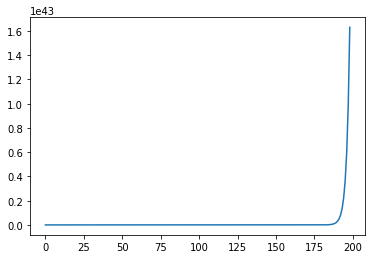

In [20]:
#7
print("7")

y = np.exp(x)

plt.plot(y)


#Question 10

In [21]:
import pandas as pd
m = 20
n = 5

Col_name= ["a", "b", "c", "d", "e"]
Matrix = np.random.uniform(1, 2, size= (m, n))



#print(Matrix)

df = pd.DataFrame(Matrix, columns= ["a", "b", "c", "d", "e"])

print(df)

#standard deviation
sd = []
for i in range(n):
    column =[]
    for j in range(m):
        column.append(Matrix[j][i])
    column = np.array(column)
    sd. append(np.std(column))
    
print(sd)
sd = list(sd)
max_sd = max(sd)

print(max_sd)
for i in range(n):
    if (max_sd==sd[i]):
        index_sd = i
        break

print("Column with highest standard deviation is ",Col_name[index_sd], " and highest standard deviation is", max_sd)


#Mean

Mean=[]
for i in Matrix:
    Mean.append(sum(i)/5)
    
    
low_mean = min(Mean)

for i in range(20):
    if Mean[i]==low_mean:
        index_mean = i
        break
        
print("Row with least mean is ", index_mean, " and the least mean is ", low_mean)


           a         b         c         d         e
0   1.140943  1.740543  1.049253  1.754462  1.225885
1   1.381675  1.682237  1.699454  1.193310  1.301297
2   1.650735  1.678949  1.042715  1.808111  1.235086
3   1.600005  1.305897  1.402784  1.831338  1.915764
4   1.537239  1.728883  1.462514  1.224756  1.475737
5   1.712044  1.719744  1.181738  1.050486  1.346854
6   1.417151  1.967744  1.829270  1.710255  1.404090
7   1.140861  1.588830  1.289148  1.112390  1.170398
8   1.668458  1.781726  1.569259  1.985791  1.891456
9   1.885031  1.392031  1.756533  1.387922  1.485437
10  1.025048  1.783748  1.365601  1.816378  1.341476
11  1.753226  1.046771  1.330364  1.844732  1.777641
12  1.694830  1.851707  1.900587  1.217164  1.527670
13  1.514681  1.600545  1.585558  1.102759  1.777006
14  1.807768  1.242728  1.574964  1.239063  1.949445
15  1.302623  1.809940  1.086275  1.685597  1.104297
16  1.212334  1.180467  1.062468  1.085202  1.171013
17  1.083017  1.531820  1.854904  1.296646  1.

#Question 11

In [22]:
avg =[]
for i in range(m):
    add = sum(Matrix[i])
    #print(add)
    avg.append(add)
    
#print(avg)
#df1 = pd.DataFrame(Mat, columns= ["a", "b", "c", "d", "e", "f"])
df1 = pd.DataFrame(avg, columns= ["f"])
df2 = pd.concat([df, df1], axis=1)

#print(df2)

LGT8=[]
for i in avg:
    if (i<8):
        LGT8.append("LT8")
    else:
        LGT8.append("GT8")
        
df3 = pd.concat([df2, pd.DataFrame(LGT8, columns= ["g"])], axis=1)
print(df2)
print(df3)
#print(pd.concat([df, df3], axis=1))


           a         b         c         d         e         f
0   1.140943  1.740543  1.049253  1.754462  1.225885  6.911086
1   1.381675  1.682237  1.699454  1.193310  1.301297  7.257973
2   1.650735  1.678949  1.042715  1.808111  1.235086  7.415595
3   1.600005  1.305897  1.402784  1.831338  1.915764  8.055788
4   1.537239  1.728883  1.462514  1.224756  1.475737  7.429129
5   1.712044  1.719744  1.181738  1.050486  1.346854  7.010866
6   1.417151  1.967744  1.829270  1.710255  1.404090  8.328510
7   1.140861  1.588830  1.289148  1.112390  1.170398  6.301627
8   1.668458  1.781726  1.569259  1.985791  1.891456  8.896689
9   1.885031  1.392031  1.756533  1.387922  1.485437  7.906954
10  1.025048  1.783748  1.365601  1.816378  1.341476  7.332250
11  1.753226  1.046771  1.330364  1.844732  1.777641  7.752734
12  1.694830  1.851707  1.900587  1.217164  1.527670  8.191958
13  1.514681  1.600545  1.585558  1.102759  1.777006  7.580548
14  1.807768  1.242728  1.574964  1.239063  1.949445  7

In [23]:
#standard deviation

LT8 =[]
GT8 =[]

for i in range(m):
    if  LGT8[i] == "LT8":
        LT8.append(float(avg[i]))
    else:
        GT8.append(float(avg[i]))

LT8 = np.array(LT8)
GT8 = np.array(GT8)
print(LT8)
print(GT8)
print("Standard deviation of rows with LT8 = ", np.std(LT8))
print("Standard deviation of rows with GT8 = ", np.std(GT8))

#print(Matrix.flatten())


[6.91108613 7.25797272 7.41559541 7.42912913 7.0108662  6.30162653
 7.90695353 7.33225018 7.75273397 7.58054848 7.8139677  6.98873133
 5.71148391 7.11590196 6.78118934]
[8.05578847 8.32851002 8.8966893  8.19195829 8.73719612]
Standard deviation of rows with LT8 =  0.5647580369524202
Standard deviation of rows with GT8 =  0.3220072294725449


#Question 12

$Broadcasting:$

Broadcasting is used to stretch/manipulate the size of the array to perform a particluar operation (addition or substraction). Here we add a single element to a $2\times 2$. This single element $10$ is reshaped in such a way that we can add it to the given matrix $A$

In [24]:
import numpy as np
import random
A = np.array([[random.randint(0, 100) for j in range(2)] for i in range(2)])
print(A)
print(A + 10)

[[33 31]
 [36 77]]
[[43 41]
 [46 87]]


In the below code, we observe that array $A$ is of size 2 and array $B$ of size 4. But while adding both of them $A$ is resized to 4 and the addition is computed

In [25]:
A = np.array([[1,2]])

B = np.array([[1,2],[5,6]])

A+B
print(B.size)

4


#Question 13

In [26]:
def argmin_compute(Matrix):
    Matrix = np.array(Matrix)
    Onedim_matrix = Matrix.flatten()
    mini = Onedim_matrix[0]
    index =0
    for i in range(len(Onedim_matrix)):
        if mini > Onedim_matrix[i]:
            mini = Onedim_matrix[i]
            index = i
            
    return index

Matrix = [[[3, 5], [1, 0]], [[-7, 4], [0, -4]], [[9, 5], [10, 5]]]
print(Matrix)
mini_inbuilt = np.argmin(Matrix)
print("inbuilt = ",mini_inbuilt)
print("manual = ",argmin_compute(Matrix))

[[[3, 5], [1, 0]], [[-7, 4], [0, -4]], [[9, 5], [10, 5]]]
inbuilt =  4
manual =  4
